In [21]:
% load_ext autoreload
% autoreload 2

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.evaluation.evaluator import Evaluator
from src.datasets import SyntheticDataGenerator, MultivariateAnomalyFunction
import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Plot missing results

In [28]:
datasets = [SyntheticDataGenerator.get(f'extreme_1_missing', 42, missing) for missing in np.linspace(0, 0.9, 5)]
detectors = main.get_detectors()[:1] + main.get_detectors()[1:]

In [29]:
seeds = np.random.randint(low=0, high=2 ** 32 - 1, size=10, dtype="uint32")
print_order = ["dataset", "algorithm", "accuracy", "precision", "recall", "F1-score", "F0.1-score", "auroc"]
rename_columns = [col for col in print_order if col not in ['dataset', 'algorithm']]
results = pd.DataFrame()

for i, seed in enumerate(seeds):
    evaluator = Evaluator(datasets if datasets else get_pipeline_datasets(seed), detectors, seed=seed, output_dir='data')
    evaluator.evaluate()
    result = evaluator.benchmarks()
    evaluator.benchmark_results = result
    evaluator.export_results(f'missing-run-{i}-{seed}')
    del evaluator  # Save memory
    results = results.append(result, ignore_index=True)

N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 16:49:57 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 2421901651


 14% (1 of 7) |###                       | Elapsed Time: 0:01:49 ETA:   0:10:54

2018-07-05 16:51:46 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 2421901651


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:32 ETA:   0:08:37

2018-07-05 16:53:29 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 2421901651
2018-07-05 16:53:29 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.430810124882555e-08
2018-07-05 16:53:29 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.39781908059922e-08
2018-07-05 16:53:29 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.447236730456325e-08
2018-07-05 16:53:30 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.704586498149865e-09
2018-07-05 16:53:31 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.580518802617007e-08


 42% (3 of 7) |###########               | Elapsed Time: 0:03:36 ETA:   0:00:16

2018-07-05 16:53:33 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2421901651


 57% (4 of 7) |##############            | Elapsed Time: 0:03:40 ETA:   0:00:12

2018-07-05 16:53:37 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2421901651


 71% (5 of 7) |##################        | Elapsed Time: 0:04:13 ETA:   0:01:06

2018-07-05 16:54:11 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 2421901651


100%|██████████| 15/15 [00:05<00:00,  2.51it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:21 ETA:   0:00:07

2018-07-05 16:54:18 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 2421901651


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpbya3jkct/variables.dat-900
2018-07-05 16:54:31 [INFO] tensorflow: Restoring parameters from /tmp/tmpbya3jkct/variables.dat-900


100%|██████████| 1/1 [00:12<00:00, 12.75s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:36 Time:  0:04:36
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 16:54:33 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 2421901651


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 16:56:15 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 2421901651


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:20 ETA:   0:08:16

2018-07-05 16:57:54 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 2421901651
2018-07-05 16:57:54 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 16:57:54 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_diag = self.compute_energy(z, phi, mu, cov)
  File "../src/algorithms/dagmm.py", line 113, in compute_energy
    cov_inv

 57% (4 of 7) |##############            | Elapsed Time: 0:03:24 ETA:   0:00:05

2018-07-05 16:57:58 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 2421901651


 71% (5 of 7) |##################        | Elapsed Time: 0:03:54 ETA:   0:01:00

2018-07-05 16:58:28 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 2421901651


100%|██████████| 15/15 [00:05<00:00,  2.53it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:02 ETA:   0:00:07

2018-07-05 16:58:36 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 2421901651


  0%|          | 0/1 [00:00<?, ?it/s]/home/thomas/.local/lib/python3.6/site-packages/tfsnippet/scaffold/early_stopping_.py:127: UserWarning: Early-stopping metric has never been updated. The variables will keep their latest values. Did you forget to add corresponding metric?
  'Early-stopping metric has never been updated. '
100%|██████████| 1/1 [00:01<00:00,  1.60s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:06 Time:  0:04:06
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 16:58:40 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 2421901651


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:02

2018-07-05 17:00:20 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 2421901651


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:04

2018-07-05 17:01:57 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 2421901651
2018-07-05 17:01:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.141269585034024e-07
2018-07-05 17:01:57 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 17:01:57 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, co

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 17:02:01 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 2421901651


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:00:59

2018-07-05 17:02:31 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 2421901651


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:03:59 ETA:   0:00:07

2018-07-05 17:02:39 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 2421901651


100%|██████████| 1/1 [00:01<00:00,  1.73s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:03 Time:  0:04:03
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:02:44 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 2421901651


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:03

2018-07-05 17:04:24 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 2421901651


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:04

2018-07-05 17:06:01 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 2421901651
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.131248255769606e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.71086798622855e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.413807002696558e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.725022447222727e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.7027355170284864e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.0847723192218837e-07
2018-07-05 17:06:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:17 ETA:   0:03:14

2018-07-05 17:06:01 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 2421901651


 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:11

2018-07-05 17:06:05 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 2421901651


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 17:06:35 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 2421901651


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:03:59 ETA:   0:00:08

2018-07-05 17:06:43 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 2421901651


100%|██████████| 1/1 [00:01<00:00,  1.90s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:04 Time:  0:04:04
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:06:48 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 2421901651


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:03

2018-07-05 17:08:28 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 2421901651


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:05

2018-07-05 17:10:05 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 2421901651
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.7124223695172986e-08
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.499134113686523e-08
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.213439280282728e-08
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.841536866389106e-08
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.981858978680975e-07
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.809418641116281e-08
2018-07-05 17:10:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.

2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.328299377855728e-07
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9313521448793836e-08
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.5227247729399096e-07
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.495444905685872e-07
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.411594881683413e-07
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.81076142477832e-07
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.454751400042369e-08
2018-07-05 17:10:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.7145817916316446e-07
2018-0

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:15

2018-07-05 17:10:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 2421901651


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 17:10:10 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 2421901651


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:10:40 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 2421901651


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:00 ETA:   0:00:08

2018-07-05 17:10:48 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 2421901651


100%|██████████| 1/1 [00:02<00:00,  2.05s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:05 Time:  0:04:05
100% (5 of 5) |##########################| Elapsed Time: 0:20:56 Time:  0:20:56


2018-07-05 17:10:55 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-0-2421901651-2018-07-05-171055.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:10:55 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 3003640154


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:03

2018-07-05 17:12:36 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 3003640154


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:04

2018-07-05 17:14:13 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 3003640154
2018-07-05 17:14:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.7947645853696486e-09
2018-07-05 17:14:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.642152238280687e-08
2018-07-05 17:14:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.012820855019527e-07
2018-07-05 17:14:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.592363798243241e-08
2018-07-05 17:14:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.320095196661214e-09
2018-07-05 17:14:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.4439182766400336e-07
2018-07-05 17:14:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9

 42% (3 of 7) |###########               | Elapsed Time: 0:03:21 ETA:   0:00:15

2018-07-05 17:14:17 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3003640154


 57% (4 of 7) |##############            | Elapsed Time: 0:03:25 ETA:   0:00:11

2018-07-05 17:14:21 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3003640154


 71% (5 of 7) |##################        | Elapsed Time: 0:03:55 ETA:   0:00:59

2018-07-05 17:14:51 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 3003640154


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:03 ETA:   0:00:08

2018-07-05 17:14:59 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 3003640154


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmporuaq0ve/variables.dat-1100
2018-07-05 17:15:19 [INFO] tensorflow: Restoring parameters from /tmp/tmporuaq0ve/variables.dat-1100


100%|██████████| 1/1 [00:19<00:00, 19.42s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:25 Time:  0:04:25
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:15:21 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 3003640154


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 17:17:02 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 3003640154


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 17:18:39 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 3003640154
2018-07-05 17:18:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.737348030583235e-07
2018-07-05 17:18:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.0801122840575772e-07
2018-07-05 17:18:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9906613601960998e-07
2018-07-05 17:18:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.793203381339481e-07
2018-07-05 17:18:39 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 17:18:39 [ERROR] src.evaluation.evaluator: Traceback (most recent call last

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:06:28

2018-07-05 17:18:39 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3003640154


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:06

2018-07-05 17:18:43 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3003640154


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:19:13 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 3003640154


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:00 ETA:   0:00:08

2018-07-05 17:19:22 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 3003640154


100%|██████████| 1/1 [00:02<00:00,  2.36s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:05 Time:  0:04:05
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:19:27 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 3003640154


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:04

2018-07-05 17:21:08 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 3003640154


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 17:22:45 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 3003640154
2018-07-05 17:22:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.953275537100126e-08
2018-07-05 17:22:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.0760244012762996e-07
2018-07-05 17:22:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1587274428848104e-07
2018-07-05 17:22:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.997094898342766e-07
2018-07-05 17:22:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.3114589592078119e-07
2018-07-05 17:22:45 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten

 42% (3 of 7) |###########               | Elapsed Time: 0:03:17 ETA:   0:06:26

2018-07-05 17:22:45 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3003640154


 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:06

2018-07-05 17:22:49 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3003640154


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 17:23:19 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 3003640154


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:00 ETA:   0:00:08

2018-07-05 17:23:27 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 3003640154


100%|██████████| 1/1 [00:02<00:00,  2.52s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:05 Time:  0:04:05
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:23:32 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 3003640154


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 17:25:13 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 3003640154


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 17:26:50 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 3003640154
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.148153323058068e-07
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.242830525276077e-07
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.169447365143242e-08
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1193125004638205e-07
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.2543534328178794e-07
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.154169452405768e-07
2018-07-05 17:26:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from 

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 17:26:50 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 3003640154


 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:11

2018-07-05 17:26:54 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 3003640154


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:27:24 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 3003640154


100%|██████████| 15/15 [00:05<00:00,  2.52it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:00 ETA:   0:00:08

2018-07-05 17:27:33 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 3003640154


100%|██████████| 1/1 [00:02<00:00,  2.71s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:06 Time:  0:04:06
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:27:39 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 3003640154


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 17:29:20 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 3003640154


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 17:30:56 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 3003640154
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.891106305469293e-07
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.924243933781327e-08
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.981065325817326e-08
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.872218291509853e-08
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.3600011072867346e-07
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1516373749363993e-07
2018-07-05 17:30:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2

 42% (3 of 7) |###########               | Elapsed Time: 0:03:17 ETA:   0:03:13

2018-07-05 17:30:57 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 3003640154


 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:11

2018-07-05 17:31:00 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 3003640154


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 17:31:30 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 3003640154


100%|██████████| 15/15 [00:05<00:00,  2.50it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:00 ETA:   0:00:08

2018-07-05 17:31:39 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 3003640154


100%|██████████| 1/1 [00:02<00:00,  2.88s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:06 Time:  0:04:06
100% (5 of 5) |##########################| Elapsed Time: 0:20:49 Time:  0:20:49


2018-07-05 17:31:48 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-1-3003640154-2018-07-05-173148.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:31:48 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 1121684101


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 17:33:28 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 1121684101


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:05

2018-07-05 17:35:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 1121684101
2018-07-05 17:35:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.453897777840666e-09
2018-07-05 17:35:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.191932685884467e-08
2018-07-05 17:35:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.518523403859945e-08


 42% (3 of 7) |###########               | Elapsed Time: 0:03:21 ETA:   0:00:15

2018-07-05 17:35:09 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1121684101


 57% (4 of 7) |##############            | Elapsed Time: 0:03:25 ETA:   0:00:11

2018-07-05 17:35:13 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1121684101


 71% (5 of 7) |##################        | Elapsed Time: 0:03:56 ETA:   0:01:00

2018-07-05 17:35:44 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 1121684101


100%|██████████| 15/15 [00:05<00:00,  2.54it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:08

2018-07-05 17:35:53 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 1121684101


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpuy9g1m2l/variables.dat-900
2018-07-05 17:36:16 [INFO] tensorflow: Restoring parameters from /tmp/tmpuy9g1m2l/variables.dat-900


100%|██████████| 1/1 [00:23<00:00, 23.74s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:31 Time:  0:04:31
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:36:19 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 1121684101


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 17:38:01 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 1121684101


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 17:39:37 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 1121684101
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.122963887491892e-09
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.080249998925865e-07
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.7286441550700147e-08
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.063218442406651e-08
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.975491200795659e-08
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.331336676457795e-07
2018-07-05 17:39:38 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 17:39:38 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1121684101


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 17:39:42 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1121684101


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:40:12 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 1121684101


100%|██████████| 15/15 [00:06<00:00,  2.50it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:01 ETA:   0:00:09

2018-07-05 17:40:21 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 1121684101


100%|██████████| 1/1 [00:03<00:00,  3.50s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:08 Time:  0:04:08
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:40:28 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 1121684101


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 17:42:09 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 1121684101


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:04

2018-07-05 17:43:45 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 1121684101
2018-07-05 17:43:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.0122337218708708e-07
2018-07-05 17:43:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.418927339131187e-07
2018-07-05 17:43:45 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.2471721194960992e-07
2018-07-05 17:43:46 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.766675552516972e-07
2018-07-05 17:43:46 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.2940469079912873e-07
2018-07-05 17:43:46 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.038606213427556e-07
2018-07-05 17:43:46 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from 

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 17:43:46 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1121684101


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 17:43:50 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1121684101


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:44:20 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 1121684101


100%|██████████| 15/15 [00:05<00:00,  2.50it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:01 ETA:   0:00:09

2018-07-05 17:44:29 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 1121684101


100%|██████████| 1/1 [00:03<00:00,  3.43s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:08 Time:  0:04:08
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:44:36 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 1121684101


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 17:46:17 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 1121684101


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 17:47:53 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 1121684101
2018-07-05 17:47:53 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.708890806639829e-08
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.212962825382419e-07
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.579905852457159e-08
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.940036211324554e-11
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.173504457114177e-08
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.7895568521785208e-08
2018-07-05 17:47:54 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 17:47:54 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1121684101


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 17:47:58 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1121684101


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:48:28 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 1121684101


100%|██████████| 15/15 [00:06<00:00,  2.49it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:01 ETA:   0:00:09

2018-07-05 17:48:37 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 1121684101


100%|██████████| 1/1 [00:03<00:00,  3.62s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:08 Time:  0:04:08
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:48:44 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 1121684101


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 17:50:25 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 1121684101


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 17:52:02 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 1121684101
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.521141126038856e-08
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.95145053239321e-08
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.396386246862676e-08
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.465732951151267e-09
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.831360366277295e-08
2018-07-05 17:52:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.307000267544936e-07
2018-07-05 17:52:02 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEnc

 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:05

2018-07-05 17:52:06 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 1121684101


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 17:52:36 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 1121684101


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:01 ETA:   0:00:09

2018-07-05 17:52:46 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 1121684101


100%|██████████| 1/1 [00:03<00:00,  3.79s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:08 Time:  0:04:08
100% (5 of 5) |##########################| Elapsed Time: 0:21:05 Time:  0:21:05


2018-07-05 17:52:55 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-2-1121684101-2018-07-05-175255.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:52:55 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 1419748698


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 17:54:36 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 1419748698


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 17:56:14 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 1419748698
2018-07-05 17:56:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.16515560427888e-08
2018-07-05 17:56:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.866466068482623e-08
2018-07-05 17:56:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.6308275497276554e-08
2018-07-05 17:56:14 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.611270920662491e-09
2018-07-05 17:56:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.53738768569201e-08
2018-07-05 17:56:15 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/T

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:16

2018-07-05 17:56:15 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1419748698


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 17:56:19 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1419748698


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 17:56:49 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 1419748698


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:03 ETA:   0:00:09

2018-07-05 17:56:59 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 1419748698


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmp9cf9gtyo/variables.dat-1100
2018-07-05 17:57:34 [INFO] tensorflow: Restoring parameters from /tmp/tmp9cf9gtyo/variables.dat-1100


100%|██████████| 1/1 [00:35<00:00, 35.16s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:41 Time:  0:04:41
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 17:57:37 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 1419748698


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:11

2018-07-05 17:59:19 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 1419748698


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 18:00:56 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 1419748698
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1230765412383334e-07
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.880093567611766e-08
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.3022100492653408e-07
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.6023584237245814e-07
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.7847215139663604e-07
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.5464345779037103e-05
2018-07-05 18:00:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon fr

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:14

2018-07-05 18:00:56 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1419748698


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 18:01:00 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1419748698


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 18:01:30 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 1419748698


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:03 ETA:   0:00:10

2018-07-05 18:01:40 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 1419748698


100%|██████████| 1/1 [00:04<00:00,  4.19s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:10 Time:  0:04:10
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:01:48 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 1419748698


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 18:03:28 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 1419748698


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:05

2018-07-05 18:05:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 1419748698
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.704906592043699e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1487799983788136e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.50773393115378e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.575193202072114e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.425034668045555e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.585671374319645e-07
2018-07-05 18:05:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:15

2018-07-05 18:05:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1419748698


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 18:05:10 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1419748698


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 18:05:40 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 1419748698


100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:03 ETA:   0:00:10

2018-07-05 18:05:51 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 1419748698


100%|██████████| 1/1 [00:04<00:00,  4.39s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:10 Time:  0:04:10
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:05:58 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 1419748698


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 18:07:39 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 1419748698


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 18:09:16 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 1419748698
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.413144895603182e-07
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.3209602773022198e-07
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.114686535354849e-07
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.6044380046764672e-08
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.4104902962562846e-08
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.1127461852520355e-07
2018-07-05 18:09:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon fro

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 18:09:17 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1419748698


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 18:09:21 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1419748698


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 18:09:51 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 1419748698


100%|██████████| 15/15 [00:06<00:00,  2.46it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:02 ETA:   0:00:10

2018-07-05 18:10:01 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 1419748698


100%|██████████| 1/1 [00:04<00:00,  4.93s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:11 Time:  0:04:11
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:10:10 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 1419748698


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 18:11:51 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 1419748698


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 18:13:28 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 1419748698
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1901716590045908e-07
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.6539004589239994e-08
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.86934805412875e-08
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1673520816657401e-07
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.124678388781831e-07
2018-07-05 18:13:28 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.2207094002292251e-08
2018-07-05 18:13:28 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAut

 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:05

2018-07-05 18:13:32 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 1419748698


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 18:14:02 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 1419748698


100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:02 ETA:   0:00:10

2018-07-05 18:14:12 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 1419748698


100%|██████████| 1/1 [00:04<00:00,  4.79s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:11 Time:  0:04:11
100% (5 of 5) |##########################| Elapsed Time: 0:21:25 Time:  0:21:25


2018-07-05 18:14:23 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-3-1419748698-2018-07-05-181423.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:14:23 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 2984800904


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 18:16:04 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 2984800904


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 18:17:41 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 2984800904
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.34809842680761e-08
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.727470740017452e-08
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.0264737948517677e-09
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.5237928130982255e-08
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.2259355308685826e-08
2018-07-05 18:17:42 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.149342203163542e-08
2018-07-05 18:17:43 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1

 42% (3 of 7) |###########               | Elapsed Time: 0:03:22 ETA:   0:00:16

2018-07-05 18:17:45 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2984800904


 57% (4 of 7) |##############            | Elapsed Time: 0:03:26 ETA:   0:00:11

2018-07-05 18:17:49 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2984800904


 71% (5 of 7) |##################        | Elapsed Time: 0:03:56 ETA:   0:01:00

2018-07-05 18:18:19 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 2984800904


100%|██████████| 15/15 [00:06<00:00,  2.45it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:06 ETA:   0:00:10

2018-07-05 18:18:30 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 2984800904


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmp241un5y1/variables.dat-1100
2018-07-05 18:19:13 [INFO] tensorflow: Restoring parameters from /tmp/tmp241un5y1/variables.dat-1100


100%|██████████| 1/1 [00:42<00:00, 42.76s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:53 Time:  0:04:53
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:19:16 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 2984800904


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:14

2018-07-05 18:20:59 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 2984800904


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:19 ETA:   0:08:04

2018-07-05 18:22:36 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 2984800904
2018-07-05 18:22:36 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 18:22:36 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_diag = self.compute_energy(z, phi, mu, cov)
  File "../src/algorithms/dagmm.py", line 113, in compute_energy
    cov_inv

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:06:27

2018-07-05 18:22:36 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 2984800904


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:05

2018-07-05 18:22:40 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 2984800904


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 18:23:10 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 2984800904


100%|██████████| 15/15 [00:06<00:00,  2.48it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:04 ETA:   0:00:10

2018-07-05 18:23:20 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 2984800904


100%|██████████| 1/1 [00:05<00:00,  5.23s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:12 Time:  0:04:12
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:23:29 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 2984800904


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 18:25:10 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 2984800904


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 18:26:48 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 2984800904
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.345515947079548e-07
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.296821091680613e-07
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.500843596768391e-08
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.0100833378601237e-06
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.8568855725552567e-08
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.172383848479512e-08
2018-07-05 18:26:48 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:15

2018-07-05 18:26:48 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 2984800904


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 18:26:52 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 2984800904


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 18:27:23 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 2984800904


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:04 ETA:   0:00:11

2018-07-05 18:27:34 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 2984800904


100%|██████████| 1/1 [00:05<00:00,  5.47s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:13 Time:  0:04:13
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:27:43 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 2984800904


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 18:29:24 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 2984800904


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:03

2018-07-05 18:31:01 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 2984800904
2018-07-05 18:31:01 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 18:31:01 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_diag = self.compute_energy(z, phi, mu, cov)
  File "../src/algorithms/dagmm.py", line 113, in compute_energy
    cov_inv

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 18:31:05 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 2984800904


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 18:31:35 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 2984800904


100%|██████████| 15/15 [00:06<00:00,  2.37it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:03 ETA:   0:00:11

2018-07-05 18:31:47 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 2984800904


100%|██████████| 1/1 [00:05<00:00,  5.70s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:13 Time:  0:04:13
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:31:56 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 2984800904


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:11

2018-07-05 18:33:38 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 2984800904


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 18:35:15 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 2984800904
2018-07-05 18:35:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.694718833801574e-10
2018-07-05 18:35:15 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 18:35:15 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_

 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:05

2018-07-05 18:35:19 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 2984800904


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 18:35:49 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 2984800904


100%|██████████| 15/15 [00:06<00:00,  2.44it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:04 ETA:   0:00:11

2018-07-05 18:36:00 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 2984800904


100%|██████████| 1/1 [00:06<00:00,  6.38s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:14 Time:  0:04:14
100% (5 of 5) |##########################| Elapsed Time: 0:21:47 Time:  0:21:47


2018-07-05 18:36:13 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-4-2984800904-2018-07-05-183613.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:36:13 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 3198619892


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:08

2018-07-05 18:37:54 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 3198619892


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 18:39:32 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 3198619892
2018-07-05 18:39:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.5054796520530545e-08
2018-07-05 18:39:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.0691516883507575e-08
2018-07-05 18:39:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.629685292911745e-07
2018-07-05 18:39:33 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.6143593484230223e-07
2018-07-05 18:39:33 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.6452009289387206e-08
2018-07-05 18:39:33 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.7387525580735428e-09
2018-07-05 18:39:33 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from

 42% (3 of 7) |###########               | Elapsed Time: 0:03:22 ETA:   0:00:15

2018-07-05 18:39:36 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3198619892


 57% (4 of 7) |##############            | Elapsed Time: 0:03:26 ETA:   0:00:11

2018-07-05 18:39:39 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3198619892


 71% (5 of 7) |##################        | Elapsed Time: 0:03:56 ETA:   0:01:00

2018-07-05 18:40:10 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 3198619892


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:08 ETA:   0:00:11

2018-07-05 18:40:21 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 3198619892


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpiprbqwdt/variables.dat-900
2018-07-05 18:41:11 [INFO] tensorflow: Restoring parameters from /tmp/tmpiprbqwdt/variables.dat-900


100%|██████████| 1/1 [00:50<00:00, 50.25s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:05:02 Time:  0:05:02
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:41:16 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 3198619892


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:13

2018-07-05 18:42:58 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 3198619892


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:19 ETA:   0:08:04

2018-07-05 18:44:35 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 3198619892
2018-07-05 18:44:35 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.172506121198239e-07
2018-07-05 18:44:35 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.0858874333052881e-07
2018-07-05 18:44:35 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.778060648888641e-07
2018-07-05 18:44:35 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.9904332993501157e-07
2018-07-05 18:44:35 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.0709316927991495e-08
2018-07-05 18:44:35 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/at

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:14

2018-07-05 18:44:35 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3198619892


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 18:44:39 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3198619892


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 18:45:09 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 3198619892


100%|██████████| 15/15 [00:06<00:00,  2.43it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:11

2018-07-05 18:45:21 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 3198619892


100%|██████████| 1/1 [00:06<00:00,  6.45s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:16 Time:  0:04:16
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:45:32 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 3198619892


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 18:47:13 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 3198619892


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 18:48:50 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 3198619892
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.639561387240974e-07
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1216619100196112e-07
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.860511957829658e-07
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.2217540163183003e-07
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.28034194708016e-07
2018-07-05 18:48:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.439472031161131e-07
2018-07-05 18:48:51 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:15

2018-07-05 18:48:51 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3198619892


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 18:48:55 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3198619892


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 18:49:25 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 3198619892


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:12

2018-07-05 18:49:37 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 3198619892


100%|██████████| 1/1 [00:06<00:00,  6.75s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:16 Time:  0:04:16
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:49:48 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 3198619892


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 18:51:29 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 3198619892


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 18:53:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 3198619892
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.0993122973322897e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1035353370280063e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.7345481612428557e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.183866278457572e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.917076642461325e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.1702867886451713e-07
2018-07-05 18:53:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon fro

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 18:53:10 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 3198619892


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 18:53:40 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 3198619892


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:04 ETA:   0:00:12

2018-07-05 18:53:52 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 3198619892


100%|██████████| 1/1 [00:06<00:00,  6.96s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:15 Time:  0:04:15
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:54:04 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 3198619892


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:06

2018-07-05 18:55:45 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 3198619892


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 18:57:21 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 3198619892
2018-07-05 18:57:21 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.3581647563305523e-08
2018-07-05 18:57:21 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.577823251698646e-08
2018-07-05 18:57:21 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.749977844970999e-07
2018-07-05 18:57:21 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.25290253119681e-09
2018-07-05 18:57:21 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 18:57:21 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  F

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 18:57:25 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 3198619892


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 18:57:55 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 3198619892


100%|██████████| 15/15 [00:06<00:00,  2.39it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:04 ETA:   0:00:12

2018-07-05 18:58:08 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 3198619892


100%|██████████| 1/1 [00:07<00:00,  7.18s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:15 Time:  0:04:15
100% (5 of 5) |##########################| Elapsed Time: 0:22:06 Time:  0:22:06


2018-07-05 18:58:22 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-5-3198619892-2018-07-05-185822.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 18:58:22 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 2436925548


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:08

2018-07-05 19:00:03 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 2436925548


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 19:01:40 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 2436925548
2018-07-05 19:01:40 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 19:01:40 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_diag = self.compute_energy(z, phi, mu, cov)
  File "../src/algorithms/dagmm.py", line 113, in compute_energy
    cov_inverse

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 19:01:40 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2436925548


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:12

2018-07-05 19:01:44 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 2436925548


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 19:02:15 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 2436925548


100%|██████████| 15/15 [00:06<00:00,  2.39it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:12

2018-07-05 19:02:27 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 2436925548


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmp5_3f_asj/variables.dat-1200
2018-07-05 19:03:16 [INFO] tensorflow: Restoring parameters from /tmp/tmp5_3f_asj/variables.dat-1200


100%|██████████| 1/1 [00:48<00:00, 48.77s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:58 Time:  0:04:58
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:03:20 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 2436925548


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:15

2018-07-05 19:05:03 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 2436925548


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:19 ETA:   0:08:03

2018-07-05 19:06:40 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 2436925548
2018-07-05 19:06:40 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.893792451975969e-08
2018-07-05 19:06:40 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 19:06:40 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, 

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:06:26

2018-07-05 19:06:40 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 2436925548


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:06

2018-07-05 19:06:44 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 2436925548


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 19:07:14 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 2436925548


100%|██████████| 15/15 [00:06<00:00,  2.41it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:06 ETA:   0:00:12

2018-07-05 19:07:27 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 2436925548


100%|██████████| 1/1 [00:07<00:00,  7.75s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:18 Time:  0:04:18
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:07:39 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 2436925548


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:08

2018-07-05 19:09:20 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 2436925548


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:03

2018-07-05 19:10:57 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 2436925548
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.146324042470951e-07
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.215854343987303e-07
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.575206903860817e-07
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.625383264236007e-08
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.990385052560669e-08
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.4630985845087707e-07
2018-07-05 19:10:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 19:10:57 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 2436925548


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 19:11:01 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 2436925548


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:00:59

2018-07-05 19:11:31 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 2436925548


100%|██████████| 15/15 [00:06<00:00,  2.34it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:13

2018-07-05 19:11:45 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 2436925548


100%|██████████| 1/1 [00:08<00:00,  8.05s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:18 Time:  0:04:18
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:11:57 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 2436925548


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 19:13:38 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 2436925548


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 19:15:15 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 2436925548
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.505891375103602e-08
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.640287324444216e-07
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.2884505546680884e-07
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.414251696336578e-07
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.202729885742883e-07
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.392461730480136e-07
2018-07-05 19:15:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 19:15:16 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 2436925548
2018-07-05 19:15:16 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.80073629457911e-06


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 19:15:19 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 2436925548


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 19:15:50 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 2436925548


100%|██████████| 15/15 [00:06<00:00,  2.37it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:13

2018-07-05 19:16:03 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 2436925548


100%|██████████| 1/1 [00:08<00:00,  8.29s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:18 Time:  0:04:18
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:16:16 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 2436925548


 14% (1 of 7) |###                       | Elapsed Time: 0:01:40 ETA:   0:10:05

2018-07-05 19:17:57 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 2436925548


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:17 ETA:   0:08:03

2018-07-05 19:19:34 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 2436925548
2018-07-05 19:19:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.6865899484014335e-09
2018-07-05 19:19:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.2651240943739595e-08
2018-07-05 19:19:34 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 19:19:34 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, i

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 19:19:37 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 2436925548


 71% (5 of 7) |##################        | Elapsed Time: 0:03:51 ETA:   0:01:00

2018-07-05 19:20:08 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 2436925548


100%|██████████| 15/15 [00:06<00:00,  2.39it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:05 ETA:   0:00:13

2018-07-05 19:20:21 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 2436925548


100%|██████████| 1/1 [00:08<00:00,  8.61s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:18 Time:  0:04:18
100% (5 of 5) |##########################| Elapsed Time: 0:22:12 Time:  0:22:12


2018-07-05 19:20:37 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-6-2436925548-2018-07-05-192037.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:20:37 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 1771257656


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 19:22:19 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 1771257656


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 19:23:55 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 1771257656
2018-07-05 19:23:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.72369163667463e-07
2018-07-05 19:23:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.273116083197692e-09
2018-07-05 19:23:56 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.669275881497015e-07
2018-07-05 19:23:57 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9775421300494145e-09
2018-07-05 19:23:58 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.617636015311291e-07


 42% (3 of 7) |###########               | Elapsed Time: 0:03:22 ETA:   0:00:15

2018-07-05 19:23:59 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1771257656


 57% (4 of 7) |##############            | Elapsed Time: 0:03:26 ETA:   0:00:11

2018-07-05 19:24:03 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 1771257656


 71% (5 of 7) |##################        | Elapsed Time: 0:03:56 ETA:   0:01:00

2018-07-05 19:24:34 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 1771257656


100%|██████████| 15/15 [00:06<00:00,  2.36it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:10 ETA:   0:00:14

2018-07-05 19:24:48 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 1771257656


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpgry0unik/variables.dat-1100
2018-07-05 19:25:54 [INFO] tensorflow: Restoring parameters from /tmp/tmpgry0unik/variables.dat-1100


100%|██████████| 1/1 [01:06<00:00, 66.06s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:05:21 Time:  0:05:21
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:25:59 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 1771257656


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:14

2018-07-05 19:27:41 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 1771257656


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:19 ETA:   0:08:04

2018-07-05 19:29:18 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 1771257656
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.897074236647313e-07
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.301351866497498e-08
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.260873538441956e-07
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.738071766041685e-07
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.787797370729095e-07
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.5311888645896943e-08
2018-07-05 19:29:18 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:06:27

2018-07-05 19:29:18 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1771257656


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:06

2018-07-05 19:29:22 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 1771257656


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 19:29:53 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 1771257656


100%|██████████| 15/15 [00:06<00:00,  2.36it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:07 ETA:   0:00:13

2018-07-05 19:30:07 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 1771257656


100%|██████████| 1/1 [00:09<00:00,  9.25s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:21 Time:  0:04:21
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:30:21 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 1771257656


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:08

2018-07-05 19:32:02 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 1771257656


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 19:33:39 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 1771257656
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.8807201008239645e-08
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.2303398117837787e-07
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.7463309493214183e-07
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.986274007023894e-07
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.3374651902940968e-07
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.470309030082717e-07
2018-07-05 19:33:39 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 19:33:40 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1771257656


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 19:33:44 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 1771257656


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 19:34:14 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 1771257656


100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:07 ETA:   0:00:14

2018-07-05 19:34:28 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 1771257656


100%|██████████| 1/1 [00:09<00:00,  9.53s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:21 Time:  0:04:21
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:34:43 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 1771257656


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 19:36:24 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 1771257656


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:03

2018-07-05 19:38:01 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 1771257656
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.943893365336407e-08
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.924823843703962e-08
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.3548755595802504e-07
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -8.733647405279044e-08
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.682775684410444e-07
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.898323820474616e-07
2018-07-05 19:38:01 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:13

2018-07-05 19:38:01 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1771257656


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 19:38:05 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 1771257656


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 19:38:35 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 1771257656


100%|██████████| 15/15 [00:06<00:00,  2.36it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:07 ETA:   0:00:15

2018-07-05 19:38:50 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 1771257656


100%|██████████| 1/1 [00:09<00:00,  9.87s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:22 Time:  0:04:22
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:39:05 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 1771257656


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 19:40:47 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 1771257656


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:03

2018-07-05 19:42:23 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 1771257656
2018-07-05 19:42:23 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.545759514305246e-07
2018-07-05 19:42:23 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 19:42:23 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_

 57% (4 of 7) |##############            | Elapsed Time: 0:03:21 ETA:   0:00:05

2018-07-05 19:42:27 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 1771257656


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 19:42:58 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 1771257656


100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:06 ETA:   0:00:14

2018-07-05 19:43:12 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 1771257656


100%|██████████| 1/1 [00:10<00:00, 10.18s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:22 Time:  0:04:22
100% (5 of 5) |##########################| Elapsed Time: 0:22:50 Time:  0:22:50


2018-07-05 19:43:30 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-7-1771257656-2018-07-05-194330.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:43:30 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 3419840286


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 19:45:11 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 3419840286


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 19:46:49 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 3419840286
2018-07-05 19:46:49 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.8439425037163346e-08
2018-07-05 19:46:49 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.5727366903538496e-08
2018-07-05 19:46:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.0124476779747056e-07
2018-07-05 19:46:50 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.150477708885774e-09
2018-07-05 19:46:51 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.194451091483643e-09


 42% (3 of 7) |###########               | Elapsed Time: 0:03:22 ETA:   0:00:15

2018-07-05 19:46:53 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3419840286


 57% (4 of 7) |##############            | Elapsed Time: 0:03:26 ETA:   0:00:11

2018-07-05 19:46:57 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 3419840286


 71% (5 of 7) |##################        | Elapsed Time: 0:03:56 ETA:   0:01:00

2018-07-05 19:47:27 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 3419840286


100%|██████████| 15/15 [00:06<00:00,  2.35it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:11 ETA:   0:00:14

2018-07-05 19:47:42 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 3419840286


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpca2i2diz/variables.dat-1200
2018-07-05 19:48:49 [INFO] tensorflow: Restoring parameters from /tmp/tmpca2i2diz/variables.dat-1200


100%|██████████| 1/1 [01:08<00:00, 68.10s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:05:24 Time:  0:05:24
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:48:55 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 3419840286


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:15

2018-07-05 19:50:38 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 3419840286


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:19 ETA:   0:08:05

2018-07-05 19:52:15 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 3419840286
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.234923262127268e-07
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9254099470344954e-07
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.991230789144538e-07
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1824687362604891e-07
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.599197728159197e-07
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.1843254194873225e-08
2018-07-05 19:52:15 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from

 42% (3 of 7) |###########               | Elapsed Time: 0:03:20 ETA:   0:03:15

2018-07-05 19:52:15 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3419840286


 57% (4 of 7) |##############            | Elapsed Time: 0:03:24 ETA:   0:00:11

2018-07-05 19:52:19 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 3419840286


 71% (5 of 7) |##################        | Elapsed Time: 0:03:54 ETA:   0:01:00

2018-07-05 19:52:50 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 3419840286


100%|██████████| 15/15 [00:06<00:00,  2.33it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:09 ETA:   0:00:15

2018-07-05 19:53:05 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 3419840286


100%|██████████| 1/1 [00:11<00:00, 11.56s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:26 Time:  0:04:26
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:53:22 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 3419840286


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 19:55:03 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 3419840286


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 19:56:41 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 3419840286
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.450547356147581e-07
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.882719899043877e-08
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.2063845506181679e-07
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.467098110832012e-07
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1565740837559133e-07
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.789123184105847e-07
2018-07-05 19:56:41 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:15

2018-07-05 19:56:41 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3419840286


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 19:56:45 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 3419840286


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 19:57:15 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 3419840286


100%|██████████| 15/15 [00:06<00:00,  2.34it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:08 ETA:   0:00:15

2018-07-05 19:57:31 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 3419840286


100%|██████████| 1/1 [00:11<00:00, 11.30s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:25 Time:  0:04:25
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 19:57:48 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 3419840286


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:10

2018-07-05 19:59:29 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 3419840286


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 20:01:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 3419840286
2018-07-05 20:01:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.267502333732409e-07
2018-07-05 20:01:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.569604760083166e-07
2018-07-05 20:01:06 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.131763151031919e-07
2018-07-05 20:01:06 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 20:01:06 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/a

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:06:27

2018-07-05 20:01:06 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 3419840286


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:06

2018-07-05 20:01:10 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 3419840286


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 20:01:41 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 3419840286


100%|██████████| 15/15 [00:06<00:00,  2.34it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:08 ETA:   0:00:15

2018-07-05 20:01:56 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 3419840286


100%|██████████| 1/1 [00:11<00:00, 11.69s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:26 Time:  0:04:26
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:02:14 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 3419840286


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:08

2018-07-05 20:03:55 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 3419840286


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 20:05:32 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 3419840286
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.541071459447267e-07
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.4204097687506874e-07
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.048990889937158e-09
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.909754344836983e-07
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.900805817773744e-08
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.1534422128534061e-07
2018-07-05 20:05:32 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 20:05:32 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 3419840286


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 20:05:36 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 3419840286


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 20:06:07 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 3419840286


100%|██████████| 15/15 [00:06<00:00,  2.28it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:08 ETA:   0:00:16

2018-07-05 20:06:23 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 3419840286


100%|██████████| 1/1 [00:12<00:00, 12.03s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:26 Time:  0:04:26
100% (5 of 5) |##########################| Elapsed Time: 0:23:10 Time:  0:23:10


2018-07-05 20:06:43 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-8-3419840286-2018-07-05-200643.pkl


N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:06:43 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.0) with seed 840763924


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 20:08:25 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.0) with seed 840763924


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 20:10:02 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0) with seed 840763924
2018-07-05 20:10:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9036706078168208e-07
2018-07-05 20:10:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.0039590137012055e-07
2018-07-05 20:10:02 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.538885072704943e-07
2018-07-05 20:10:03 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.348152474331073e-08
2018-07-05 20:10:03 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.3033422119335114e-09
2018-07-05 20:10:03 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.0): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/sr

 42% (3 of 7) |###########               | Elapsed Time: 0:03:19 ETA:   0:03:16

2018-07-05 20:10:03 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 840763924


 57% (4 of 7) |##############            | Elapsed Time: 0:03:23 ETA:   0:00:11

2018-07-05 20:10:07 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.0) with seed 840763924


 71% (5 of 7) |##################        | Elapsed Time: 0:03:53 ETA:   0:01:00

2018-07-05 20:10:37 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.0) with seed 840763924


100%|██████████| 15/15 [00:06<00:00,  2.32it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:10 ETA:   0:00:16

2018-07-05 20:10:53 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.0) with seed 840763924


  0%|          | 0/1 [00:00<?, ?it/s]

INFO:tensorflow:Restoring parameters from /tmp/tmpsw2y7j35/variables.dat-1200
2018-07-05 20:12:10 [INFO] tensorflow: Restoring parameters from /tmp/tmpsw2y7j35/variables.dat-1200


100%|██████████| 1/1 [01:16<00:00, 76.85s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:05:33 Time:  0:05:33
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:12:16 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.225) with seed 840763924


 14% (1 of 7) |###                       | Elapsed Time: 0:01:42 ETA:   0:10:17

2018-07-05 20:13:59 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.225) with seed 840763924


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:20 ETA:   0:08:06

2018-07-05 20:15:37 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225) with seed 840763924
2018-07-05 20:15:37 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.673820169249666e-08
2018-07-05 20:15:37 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.225): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 20:15:37 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, c

 57% (4 of 7) |##############            | Elapsed Time: 0:03:24 ETA:   0:00:05

2018-07-05 20:15:41 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.225) with seed 840763924


 71% (5 of 7) |##################        | Elapsed Time: 0:03:54 ETA:   0:01:00

2018-07-05 20:16:11 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.225) with seed 840763924


100%|██████████| 15/15 [00:06<00:00,  2.33it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:10 ETA:   0:00:16

2018-07-05 20:16:27 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.225) with seed 840763924


100%|██████████| 1/1 [00:12<00:00, 12.84s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:29 Time:  0:04:29
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:16:46 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.45) with seed 840763924


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:09

2018-07-05 20:18:28 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.45) with seed 840763924


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 20:20:05 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.45) with seed 840763924
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.1665054816821794e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.621363819343969e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -4.002449429663102e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -5.645075020765944e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.270344670156192e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -2.6575651190796634e-07
2018-07-05 20:20:05 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:13

2018-07-05 20:20:05 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 840763924


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 20:20:09 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.45) with seed 840763924


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 20:20:39 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.45) with seed 840763924


100%|██████████| 15/15 [00:06<00:00,  2.31it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:09 ETA:   0:00:16

2018-07-05 20:20:56 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.45) with seed 840763924


100%|██████████| 1/1 [00:13<00:00, 13.31s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:29 Time:  0:04:29
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:21:16 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.675) with seed 840763924


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:10

2018-07-05 20:22:57 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.675) with seed 840763924


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:04

2018-07-05 20:24:34 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.675) with seed 840763924
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -9.140592993617247e-08
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.611072222995062e-08
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.9939740969476816e-09
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -7.321239650082134e-07
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -6.495279194496106e-07
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -3.7525214224842784e-07
2018-07-05 20:24:34 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -

 42% (3 of 7) |###########               | Elapsed Time: 0:03:18 ETA:   0:03:14

2018-07-05 20:24:34 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 840763924


 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:11

2018-07-05 20:24:38 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.675) with seed 840763924


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 20:25:09 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.675) with seed 840763924


100%|██████████| 15/15 [00:06<00:00,  2.31it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:09 ETA:   0:00:17

2018-07-05 20:25:26 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.675) with seed 840763924


100%|██████████| 1/1 [00:13<00:00, 13.73s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:30 Time:  0:04:30
N/A% (0 of 7) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

2018-07-05 20:25:46 [INFO] src.evaluation.evaluator: Training LSTM-AD on Syn Extreme Outliers (mis=0.9) with seed 840763924


 14% (1 of 7) |###                       | Elapsed Time: 0:01:41 ETA:   0:10:07

2018-07-05 20:27:27 [INFO] src.evaluation.evaluator: Training LSTMED on Syn Extreme Outliers (mis=0.9) with seed 840763924


 28% (2 of 7) |#######                   | Elapsed Time: 0:03:18 ETA:   0:08:05

2018-07-05 20:29:04 [INFO] src.evaluation.evaluator: Training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9) with seed 840763924
2018-07-05 20:29:04 [WARNING] root: Determinant was negative! Clipping Eigenvalues to 0+epsilon from -1.2552293071621534e-07
2018-07-05 20:29:04 [ERROR] src.evaluation.evaluator: An exception occurred while training DAGMM_NNAutoEncoder_withoutWindow on Syn Extreme Outliers (mis=0.9): Lapack Error getrf : U(3,3) is 0, U is singular at /pytorch/aten/src/TH/generic/THTensorLapack.c:514
2018-07-05 20:29:04 [ERROR] src.evaluation.evaluator: Traceback (most recent call last):
  File "../src/evaluation/evaluator.py", line 122, in evaluate
    det.fit(X_train.copy(), y_train.copy())
  File "../src/algorithms/dagmm.py", line 203, in fit
    self.dagmm_step(input_data.float())
  File "../src/algorithms/dagmm.py", line 177, in dagmm_step
    self.lambda_cov_diag)
  File "../src/algorithms/dagmm.py", line 144, in loss_function
    sample_energy, cov_

 57% (4 of 7) |##############            | Elapsed Time: 0:03:22 ETA:   0:00:05

2018-07-05 20:29:08 [INFO] src.evaluation.evaluator: Training DAGMM_LSTMAutoEncoder_withWindow on Syn Extreme Outliers (mis=0.9) with seed 840763924


 71% (5 of 7) |##################        | Elapsed Time: 0:03:52 ETA:   0:01:00

2018-07-05 20:29:38 [INFO] src.evaluation.evaluator: Training Recurrent EBM on Syn Extreme Outliers (mis=0.9) with seed 840763924


100%|██████████| 15/15 [00:06<00:00,  2.30it/s]
 85% (6 of 7) |######################    | Elapsed Time: 0:04:09 ETA:   0:00:17

2018-07-05 20:29:56 [INFO] src.evaluation.evaluator: Training Donut on Syn Extreme Outliers (mis=0.9) with seed 840763924


100%|██████████| 1/1 [00:14<00:00, 14.12s/it]
100% (7 of 7) |##########################| Elapsed Time: 0:04:30 Time:  0:04:30
100% (5 of 5) |##########################| Elapsed Time: 0:23:33 Time:  0:23:33


2018-07-05 20:30:19 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-run-9-840763924-2018-07-05-203019.pkl


In [30]:
avg_results = results.groupby(["dataset", "algorithm"], as_index=False).mean()
std_results = results.groupby(["dataset", "algorithm"]).std(ddof=0)

evaluator = Evaluator(datasets if datasets else get_pipeline_datasets(seed), detectors, seed=42, output_dir='data')
evaluator.benchmark_results = avg_results

In [31]:
print(f'{"-"*20} Average {"-"*20}')
print(avg_results)
print(f'{"-"*22} Std {"-"*22}')
print(std_results)

-------------------- Average --------------------
                             dataset                          algorithm  \
0     Syn Extreme Outliers (mis=0.0)   DAGMM_LSTMAutoEncoder_withWindow   
1     Syn Extreme Outliers (mis=0.0)     DAGMM_NNAutoEncoder_withWindow   
2     Syn Extreme Outliers (mis=0.0)  DAGMM_NNAutoEncoder_withoutWindow   
3     Syn Extreme Outliers (mis=0.0)                              Donut   
4     Syn Extreme Outliers (mis=0.0)                            LSTM-AD   
5     Syn Extreme Outliers (mis=0.0)                             LSTMED   
6     Syn Extreme Outliers (mis=0.0)                      Recurrent EBM   
7   Syn Extreme Outliers (mis=0.225)   DAGMM_LSTMAutoEncoder_withWindow   
8   Syn Extreme Outliers (mis=0.225)     DAGMM_NNAutoEncoder_withWindow   
9   Syn Extreme Outliers (mis=0.225)  DAGMM_NNAutoEncoder_withoutWindow   
10  Syn Extreme Outliers (mis=0.225)                              Donut   
11  Syn Extreme Outliers (mis=0.225)              

In [32]:
path = evaluator.export_results('missing-final')

2018-07-05 20:30:19 [INFO] src.evaluation.evaluator: Store evaluator results at /home/thomas/work/notebooks/data/missing-final-2018-07-05-203019.pkl


In [35]:
evaluator2 = Evaluator(datasets, detectors, output_dir='data')
evaluator2.import_results(path[5:-4])

2018-07-10 09:20:22 [INFO] src.evaluation.evaluator: Read evaluator results at /home/thomas/work/notebooks/data/missing-final-2018-07-05-203019.pkl


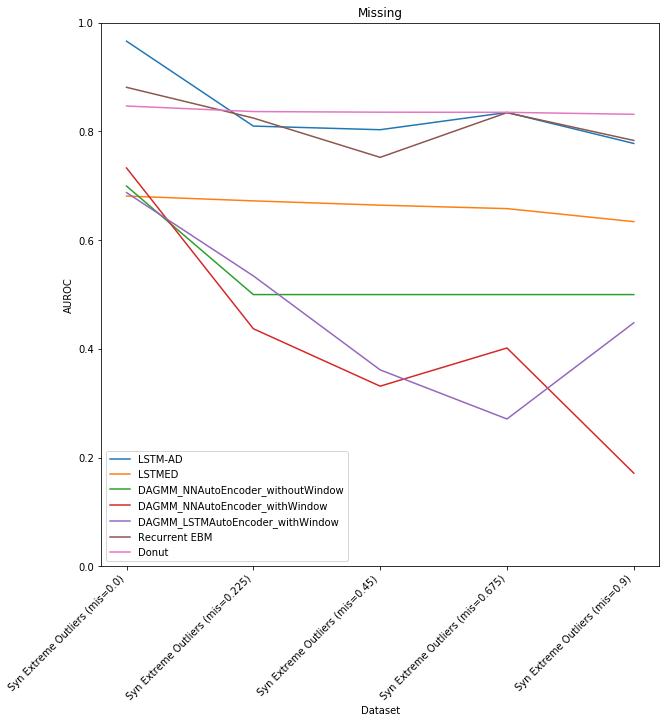

In [36]:
fig = evaluator2.plot_experiment_comparison('Missing')